# **Daily Power Generation In India**

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Introduction**

#**India is the world's third-largest producer and third largest consumer of electricity.**
India's electricity sector is dominated by fossil fuels, in particular coal, which during the 2018-19 fiscal year produced about three-quarters of the country's electricity. The government is making efforts to increase investment in renewable energy. The government's National Electricity Plan of 2018 states that the country does not need more non-renewable power plants in the utility sector until 2027, with the commissioning of 50,025 MW coal-based power plants under construction and addition of 275,000 MW total renewable power capacity after the retirement of nearly 48,000 MW old coal-fired plants.

India has recorded rapid growth in electricity generation since 1985, increasing from 179 TW-hr in 1985 to 1,057 TW-hr in 2012. The majority of the increase came from coal-fired plants and non-conventional renewable energy sources (RES), with the contribution from natural gas, oil, and hydro plants decreasing in 2012-2017. The gross utility electricity generation (excluding imports from Bhutan) was 1,384 billion kWh in 2019-20, representing 1.0 % annual growth compared to 2018-2019. The contribution from renewable energy sources was nearly 20% of the total. In the year 2019-20, all the incremental electricity generation is contributed by renewable energy sources as the power generation from fossil fuels decreased.

India's electricity sector consumes about 72% of the coal produced in the country. For utility power generation, India consumed 622.22 million tons of coal during 2019-20 which is less by 1% compared to 628.94 million tons during 2018-19. However coal imports for utility power generation increased by 12.3% during year 2019-20 at 69.22 million tons from 61.66 million tons during 2018-19

Thermal power production consists of coal, lignite, gas and diesel.

From our analysis, India generates 85.7% of power using thermal which plays a major role in pollution. Nuclear generate 2.3%, this also impact enviornment in major level. From hydro 11% are generated

There are four types of environment impacts based on the nature and features of the impacts:

• Direct impact- e.g. Impact of untreated wastewater from the power plant discharged into a river or stream impacting marine life.

• Indirect impact - e.g. SO2 from power plant deposited as SO4 on the soil affects farming.

• Cumulative impact - e.g. Combined impact of all emissions of existing and upcoming projects in a region

• Induced impact - e.g. Impact of change in land use patterns and population in the area because of the plant on the existing natural resources like water, air.
Environmental Impact

1) Air Pollution
2) Water Pollution
3) Land Degradation
4) Noise pollution

# **Loding Libraries**

In [145]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import pandas_profiling
import os
import calendar
pio.templates.default = "plotly_dark"
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


## **Importing the data.**
### **Description of Data**
Dataset contains two files

One file contains the power generation via different channels i.e. Thermal, Nuclear, Hydro generated from september 2017 to March 2020.

Other file contains the data of national share of different states.

In [146]:
generation = pd.read_csv("/content/drive/MyDrive/data/file_02.csv")
generation.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [147]:
state_df = pd.read_csv('/content/drive/MyDrive/data/State_Region_corrected.csv')
state_df.head()

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


In [148]:
generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


Data has a variety of types.The main types stored in Pandas dataframes are object, float, int, bool and datetime64. In order to better learn about each attribute, it is always good to know the data type of each column. In Pandas

From the information of data we can see that Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU) this feature are in numerical value but it is in object type so we need to convert it into int64 and float64 according to the feature values.

In [149]:
generation['Thermal Generation Estimated (in MU)'] = generation['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')
generation['Thermal Generation Actual (in MU)'] = generation['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')

In [150]:
# generation[['Thermal Generation Estimated (in MU)']] = generation[['Thermal Generation Estimated (in MU)']].astype(str).astype(float)
# generation[['Thermal Generation Estimated (in MU)']] = generation[['Thermal Generation Estimated (in MU)']].astype(str).astype(float)

# **Handling missing values**

Calculating the precentage of missing values 

In [151]:
generation.isnull().sum()/generation.shape[0] * 100

index                                    0.0
Date                                     0.0
Region                                   0.0
Thermal Generation Actual (in MU)        0.0
Thermal Generation Estimated (in MU)     0.0
Nuclear Generation Actual (in MU)       40.0
Nuclear Generation Estimated (in MU)    40.0
Hydro Generation Actual (in MU)          0.0
Hydro Generation Estimated (in MU)       0.0
dtype: float64

####From the above we can see that 40 precent of missing values are in Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU).
####The resion behind the missing values May be 
####1)The Nuclear plants were down for maintenance or some reason and hence did not produce any electrity on those days to record.
####2)Maybe there are no Nuclear plants in some regions meaning that there are no values to record there.

In [152]:
generation[['Region', 'Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)']].groupby('Region').sum()


,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU)
Region,,
Eastern,0.00,0.00
NorthEastern,0.00,0.00
Northern,26964.08,31378.94
Southern,55855.21,46483.24
Western,27678.34,31880.85


We notice something interesting here, which is that: There is no nuclear power being generated in the Eastern and NorthEastern regions, for over 4 years.

Now, its highly unlikely that for 4 years the nuclear plants there have not produced any electricity due to maintenance or other such reasons. So it is possible that there are no nuclear power plants or at least no active nuclear power plants in the Eastern and NorthEastern regions of India.
We observe that there are no nuclear power plants in the Eastern and NorthEastern regions of India.

The right thing to do would be to fill the NaN values with 0 as that would show that no nuclear power is being generated in the Eastern and NorthEatern regions over the course of the 4 years of data we have.

We cannot remove the rows outright as that would remove the data regarding the other power generation techniques in the Eastern and NorthEatern regions of India.

In [153]:
generation.fillna(0.0, inplace=True)
generation.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21


In [154]:
generation['Date'] = pd.to_datetime(generation['Date'])

In [155]:
generation.describe()

,index,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000,4945.000000
mean,2181.433771,603.978358,575.395116,22.345325,22.192726,73.305921,76.842965
std,1397.754755,383.534208,383.387299,22.006882,20.189857,74.482145,82.043952
min,0.000000,12.340000,12.380000,0.000000,0.000000,0.000000,0.000000
25%,926.000000,470.050000,427.460000,0.000000,0.000000,26.910000,23.310000
50%,2162.000000,615.280000,535.980000,25.130000,28.460000,52.960000,50.270000
75%,3398.000000,689.530000,672.740000,34.020000,36.600000,85.940000,95.800000
max,4634.000000,1395.970000,1442.380000,68.740000,76.640000,348.720000,397.380000


The above statistic is not correct with regards to the Nuclear Generation columns, as the values for mean, std etc, include the values from the Eastern and NorthEastern regions, which do not have any nuclear power plants (atleast no active ones). So the values from those regions are 0, and hence they would skew the stats for these columns.

# **Time series analysis of Thermal , Nuclear and Hydro power genetation**

In [156]:
def time_series_overall(df, groupby, dict_features, filter=None):
    temp = df.groupby(groupby).agg(dict_features)
    fig = go.Figure()
    for f,c in zip(dict_features, px.colors.qualitative.D3):
        fig.add_traces(go.Scatter(y=temp[f].values,x=temp.index,name=f,marker=dict(color=c)))
    fig.update_traces(marker_line_color='rgb(255,255,255)',marker_line_width=2.5, opacity=0.7)
    fig.update_layout(width=1000,xaxis=dict(title="Date", showgrid=False),yaxis=dict(title="MU", showgrid=False),legend=dict(x=0,y=1.2))                           
    fig.show()

In [157]:
dict_features = {"Thermal Generation Estimated (in MU)": "sum","Thermal Generation Actual (in MU)": "sum",  }
time_series_overall(generation, groupby="Date", dict_features=dict_features)
dict_features = {"Nuclear Generation Estimated (in MU)": "sum","Nuclear Generation Actual (in MU)": "sum",}
time_series_overall(generation, groupby="Date", dict_features=dict_features)
dict_features = {"Hydro Generation Estimated (in MU)": "sum","Hydro Generation Actual (in MU)": "sum"}
time_series_overall(generation, groupby="Date", dict_features=dict_features)

The graph clearly show that the Actual Power Generated is much higher than the Estimated one.and the thermal power is generated more compare to other power plants.

We also notice sudden drop in the year 2017 during September month

In 2015, Coal Minister Piyush Goyal, put forward an ambitious target to virtually cease thermal coal imports within 2-3 years.When the Indian goal was announced, both the IEA and the Australian Government’s Office of the Chief Economist said this target was unachievable.

Looking at the fiscal year to-date (April to September 2017), data shows the trend has continued and Indian coal imports have fallen a further 7.5%,118 and within this the rate of decline in thermal coal imports is even more dramatic.

In [158]:
generation['Thermal Generation Estimated (in MU)'] = generation['Thermal Generation Estimated (in MU)'].astype(str).astype(float)
generation['Thermal Generation Estimated (in MU)'] = generation['Thermal Generation Estimated (in MU)'].astype(str).astype(float)

In [159]:
generation['Date'] = pd.to_datetime(generation['Date'])

In [160]:
generation['Thermal Generation Estimated (in MU)'] = generation['Thermal Generation Estimated (in MU)'].astype(str).str.replace(',','').astype('float')
generation['Thermal Generation Estimated (in MU)'].values

array([ 484.21, 1024.33,  578.55, ...,  415.53,  547.03,   32.81])

In [161]:
generation['Thermal Generation Actual (in MU)'] = generation['Thermal Generation Actual (in MU)'].astype(str).str.replace(',','').astype('float')
generation['Thermal Generation Actual (in MU)'].values

array([ 624.23, 1106.89,  576.66, ...,  494.66,  482.86,   34.42])

In [162]:
actual_col = []
for col in generation.columns:
    if 'Actual' in col:
        actual_col.append(col)
generation['Total Generation Actual (in MU)'] = 0
for col in actual_col:
    generation['Total Generation Actual (in MU)'] = generation['Total Generation Actual (in MU)'] + generation[col]
generation.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Generation Actual (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86
1,1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96
3,3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,526.96
4,4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,53.75


From the above data frame, we can see the Total Generation Actual (in MU) which is the sum of all the actual power generation, the actual power generation is more in the western region compare to all other region.

In [163]:
estimated_col = []
for col in generation.columns:
    if 'Estimated' in col:
        estimated_col.append(col)
generation['Total Generation Estimated (in MU)'] = 0
for col in estimated_col:
    generation['Total Generation Estimated (in MU)'] = generation['Total Generation Estimated (in MU)'] + generation[col]
generation.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Generation Actual (in MU),Total Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86,840.59
1,1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06,1049.67
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96,693.13
3,3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,526.96,498.75
4,4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,53.75,37.12


From the above data frame, we can see the Total Generation Estimated (in MU) which is the sum of all the Estimated power generation,the estimated power generation is more in the western region compare to all other region.

In [164]:
generation['Net Surplus'] = generation['Total Generation Actual (in MU)'] - generation['Total Generation Estimated (in MU)']
generation.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86,840.59,87.27
1,1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06,1049.67,154.39
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96,693.13,57.83
3,3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,526.96,498.75,28.21
4,4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,53.75,37.12,16.63


From the above data frame, we can see the difference between actual power generation and estimated power generation, that is Net Surplus.

In [165]:
generation['Year'] = pd.DatetimeIndex(generation['Date']).year
generation['Month'] = pd.DatetimeIndex(generation['Date']).month

In [166]:
generation['Surplus in Thermal Generation'] = generation['Thermal Generation Actual (in MU)'] - generation['Thermal Generation Estimated (in MU)']
generation['Surplus in Nuclear Generation'] = generation['Nuclear Generation Actual (in MU)'] - generation['Nuclear Generation Estimated (in MU)']
generation['Surplus in Hydro Generation'] = generation['Hydro Generation Actual (in MU)'] - generation['Hydro Generation Estimated (in MU)']

In [167]:
generation = generation[['Date','Region','Month', 'Year', 'Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)', 'Surplus in Thermal Generation', 'Nuclear Generation Actual (in MU)', 
           'Nuclear Generation Estimated (in MU)', 'Surplus in Nuclear Generation', 'Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)',
           'Surplus in Hydro Generation', 'Total Generation Actual (in MU)','Total Generation Estimated (in MU)', 'Net Surplus']]

In [168]:
generation.head()

,Date,Region,Month,Year,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Surplus in Thermal Generation,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Surplus in Nuclear Generation,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Surplus in Hydro Generation,Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
0,2017-09-01,Northern,9,2017,624.23,484.21,140.02,30.36,35.57,-5.21,273.27,320.81,-47.54,927.86,840.59,87.27
1,2017-09-01,Western,9,2017,1106.89,1024.33,82.56,25.17,3.81,21.36,72.00,21.53,50.47,1204.06,1049.67,154.39
2,2017-09-01,Southern,9,2017,576.66,578.55,-1.89,62.73,49.80,12.93,111.57,64.78,46.79,750.96,693.13,57.83
3,2017-09-01,Eastern,9,2017,441.02,429.39,11.63,0.00,0.00,0.00,85.94,69.36,16.58,526.96,498.75,28.21
4,2017-09-01,NorthEastern,9,2017,29.11,15.91,13.20,0.00,0.00,0.00,24.64,21.21,3.43,53.75,37.12,16.63


The above data frame the surplus power generation of the three power generation plant.

##**Monthly Power Generation Between September 2017 and March 2020**

In [169]:
monthly_generation = generation[['Month', 'Year', 'Total Generation Actual (in MU)']].groupby(['Year', 'Month']).agg(sum)
monthly_generation.style.background_gradient(cmap='Blues_r')

Here we can see the monthly and yearly power consumption of the generation plant, from 2017 to 2020.

## **Northern Region Power**

In [170]:
north_power = generation[generation.Region == 'Northern'].drop(['Region'], axis = 1)
north_power.head()

,Date,Month,Year,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Surplus in Thermal Generation,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Surplus in Nuclear Generation,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Surplus in Hydro Generation,Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
0,2017-09-01,9,2017,624.23,484.21,140.02,30.36,35.57,-5.21,273.27,320.81,-47.54,927.86,840.59,87.27
5,2017-09-02,9,2017,624.23,507.42,116.81,30.36,35.69,-5.33,273.27,317.19,-43.92,927.86,860.30,67.56
10,2017-09-03,9,2017,624.23,492.69,131.54,30.36,35.65,-5.29,273.27,316.69,-43.42,927.86,845.03,82.83
15,2017-09-04,9,2017,624.23,568.34,55.89,30.36,35.62,-5.26,273.27,297.47,-24.20,927.86,901.43,26.43
20,2017-09-05,9,2017,628.58,597.08,31.50,30.36,35.72,-5.36,273.27,290.23,-16.96,932.21,923.03,9.18


The above data frame shows only the northern region power of three power generation plants. 

## **Southern Region Power**

In [171]:
south_power = generation[generation.Region == 'Southern'].drop(['Region'], axis = 1)
south_power.head()

,Date,Month,Year,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Surplus in Thermal Generation,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Surplus in Nuclear Generation,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Surplus in Hydro Generation,Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
2,2017-09-01,9,2017,576.66,578.55,-1.89,62.73,49.80,12.93,111.57,64.78,46.79,750.96,693.13,57.83
7,2017-09-02,9,2017,576.66,562.79,13.87,62.73,52.76,9.97,111.57,59.49,52.08,750.96,675.04,75.92
12,2017-09-03,9,2017,572.16,530.68,41.48,62.73,53.12,9.61,111.57,47.53,64.04,746.46,631.33,115.13
17,2017-09-04,9,2017,572.16,562.81,9.35,62.73,53.19,9.54,111.57,66.20,45.37,746.46,682.20,64.26
22,2017-09-05,9,2017,576.35,575.06,1.29,62.73,53.16,9.57,111.57,58.00,53.57,750.65,686.22,64.43


The above data frame shows only the southern region power of three power generation plants. 

## **Western Region Power**

In [172]:
western_power = generation[generation.Region == 'Western'].drop(['Region'], axis = 1)
western_power.head()

,Date,Month,Year,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Surplus in Thermal Generation,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Surplus in Nuclear Generation,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Surplus in Hydro Generation,Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
1,2017-09-01,9,2017,1106.89,1024.33,82.56,25.17,3.81,21.36,72.0,21.53,50.47,1204.06,1049.67,154.39
6,2017-09-02,9,2017,1106.89,1050.91,55.98,25.17,3.83,21.34,72.0,23.97,48.03,1204.06,1078.71,125.35
11,2017-09-03,9,2017,1106.89,1066.73,40.16,25.17,3.80,21.37,72.0,13.94,58.06,1204.06,1084.47,119.59
16,2017-09-04,9,2017,1106.89,1115.43,-8.54,25.17,3.81,21.36,72.0,37.38,34.62,1204.06,1156.62,47.44
21,2017-09-05,9,2017,1106.89,1131.78,-24.89,25.17,3.83,21.34,72.0,28.78,43.22,1204.06,1164.39,39.67


The above data frame shows only the western region power of three power generation plants. 

## **Eastern Region Power**

In [173]:
Eastern_power = generation[generation.Region == 'Eastern'].drop(['Region'], axis = 1)
Eastern_power.head()

,Date,Month,Year,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Surplus in Thermal Generation,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Surplus in Nuclear Generation,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Surplus in Hydro Generation,Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
3,2017-09-01,9,2017,441.02,429.39,11.63,0.0,0.0,0.0,85.94,69.36,16.58,526.96,498.75,28.21
8,2017-09-02,9,2017,441.02,425.75,15.27,0.0,0.0,0.0,85.94,74.18,11.76,526.96,499.93,27.03
13,2017-09-03,9,2017,445.38,427.61,17.77,0.0,0.0,0.0,85.94,71.05,14.89,531.32,498.66,32.66
18,2017-09-04,9,2017,445.38,450.85,-5.47,0.0,0.0,0.0,85.94,75.21,10.73,531.32,526.06,5.26
23,2017-09-05,9,2017,449.92,459.09,-9.17,0.0,0.0,0.0,85.94,70.29,15.65,535.86,529.38,6.48


The above data frame shows only the Eastern region power of three power generation plants. 

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# **Data Visulization in all regions**
## **Power Generation In Northen Region**


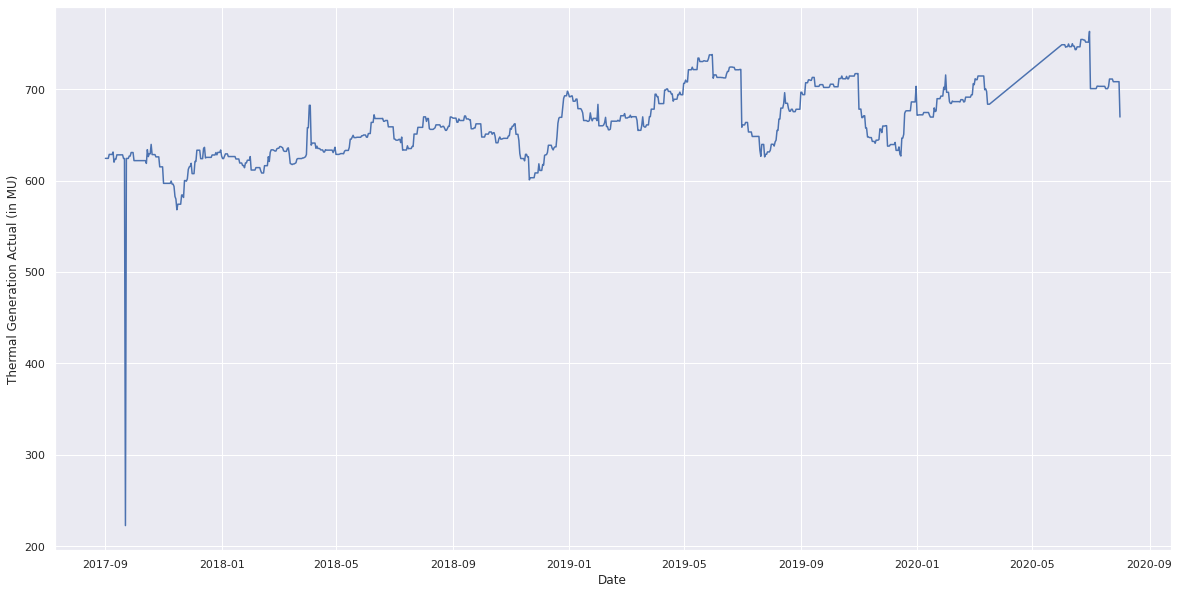

In [175]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Thermal Generation Actual (in MU)', data = north_power)
plt.show()

From the above visualization, we can clearly say that in the northern region the thermal power generation is increasing continuously year by year.

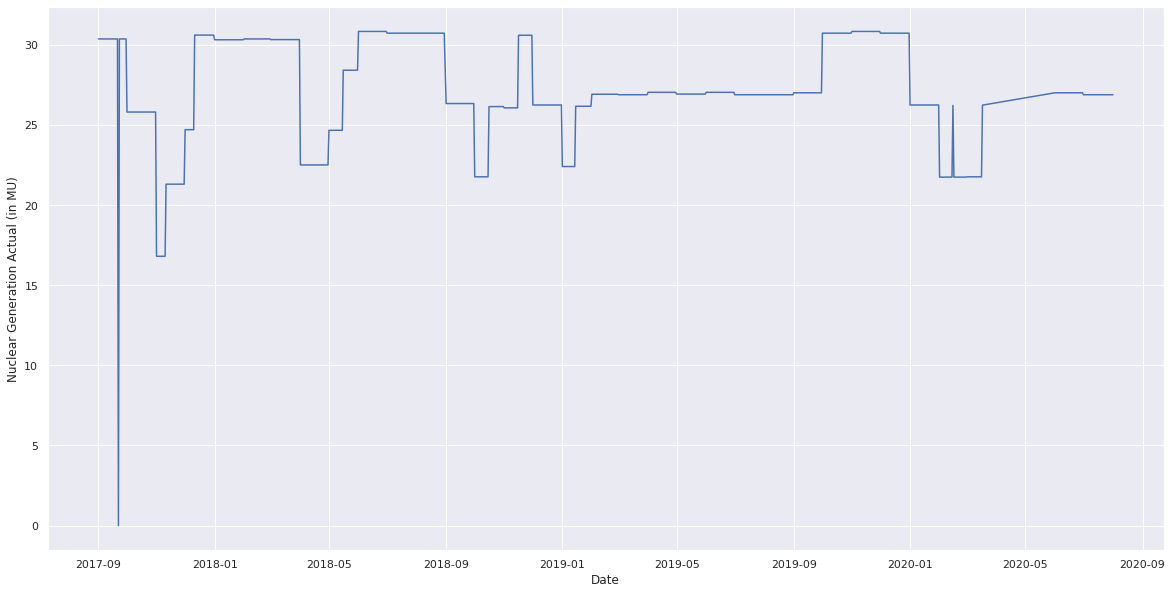

In [176]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Nuclear Generation Actual (in MU)', data = north_power)
plt.show()

From the above visualization, we can clearly say that in the northern region the nuclear power generation constant through out the year.

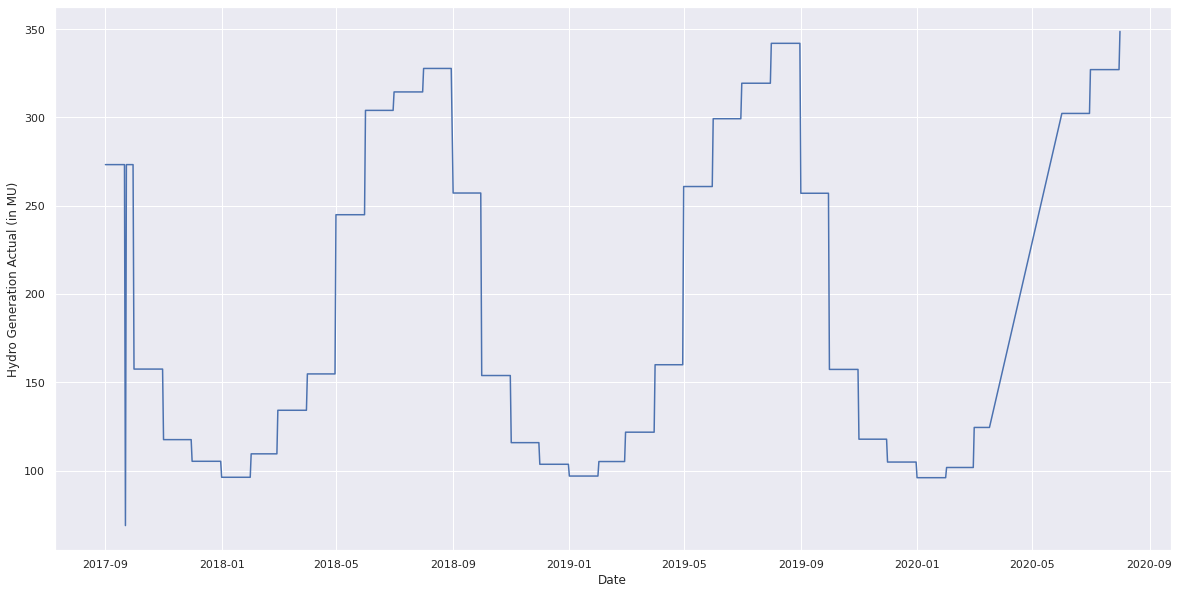

In [177]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Hydro Generation Actual (in MU)', data = north_power)
plt.show()

From the above visualization, we can clearly say that in the northern region the hydropower generation is slightly increasing and decreasing year by year. but throughout the year's power generation is increasing slowly.

## **Power Generation In Southern Region**

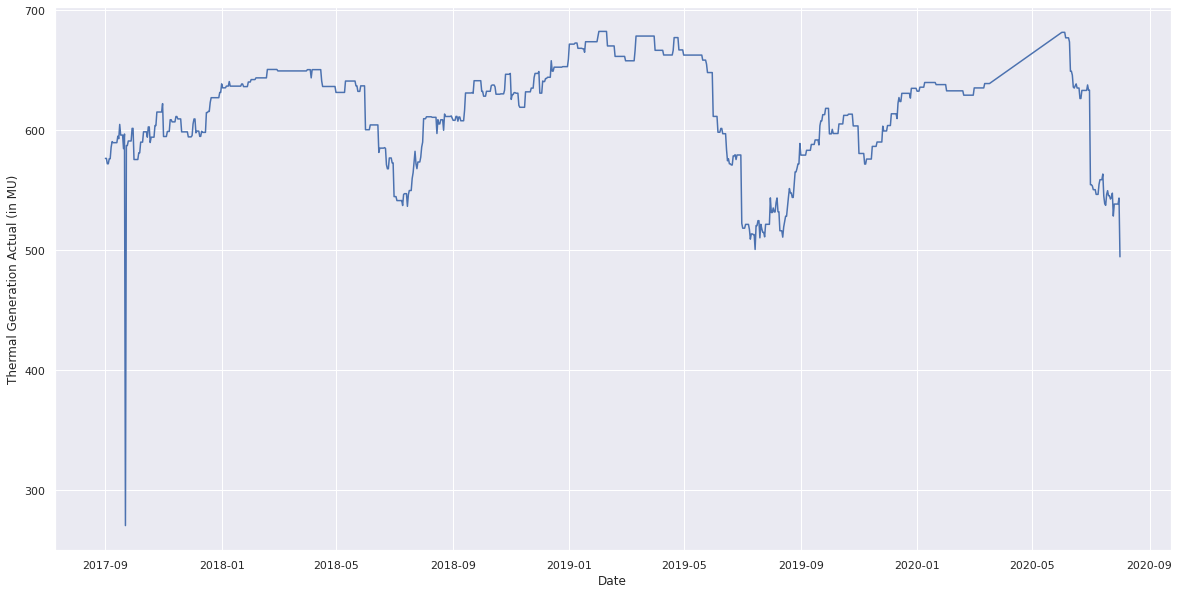

In [178]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Thermal Generation Actual (in MU)', data = south_power)
plt.show()

From the above visualization, we can say that in the southern region the thermal power generation is gradually increasing and decreasing year by year.

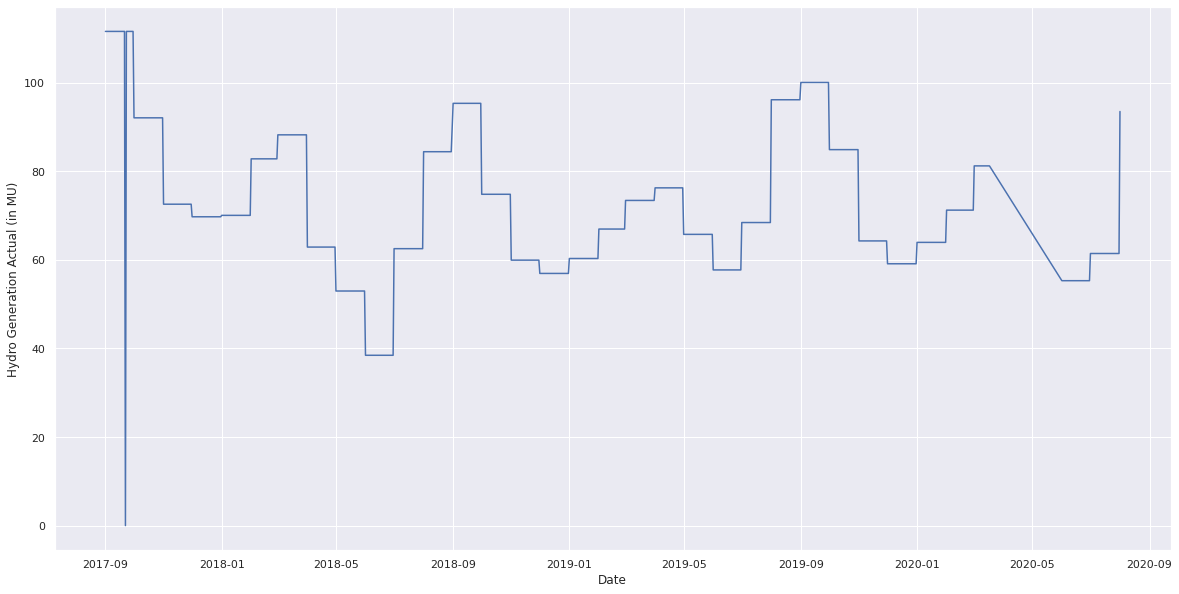

In [179]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Hydro Generation Actual (in MU)', data = south_power)
plt.show()

From the above visualization, we can say that in the southern region the hydro power generation is gradually decreasing year by year.

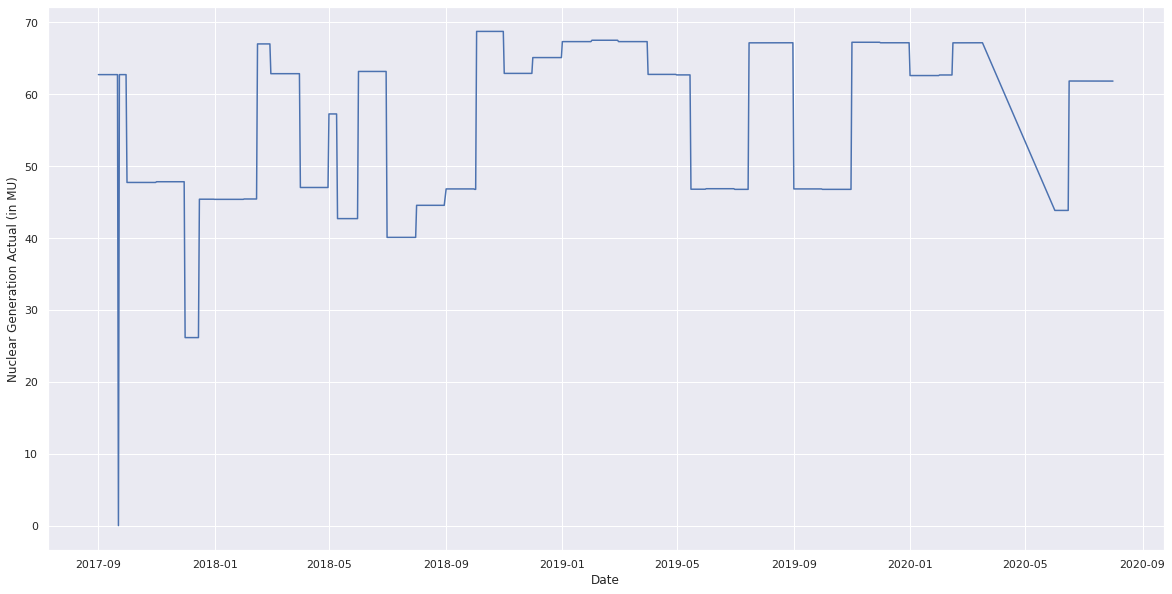

In [180]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Nuclear Generation Actual (in MU)', data = south_power)
plt.show()

From the above visualization, we can say that in the southern region the Nuclear power generation is slowly increasing year by year.

## **Power Generation In Western Region**

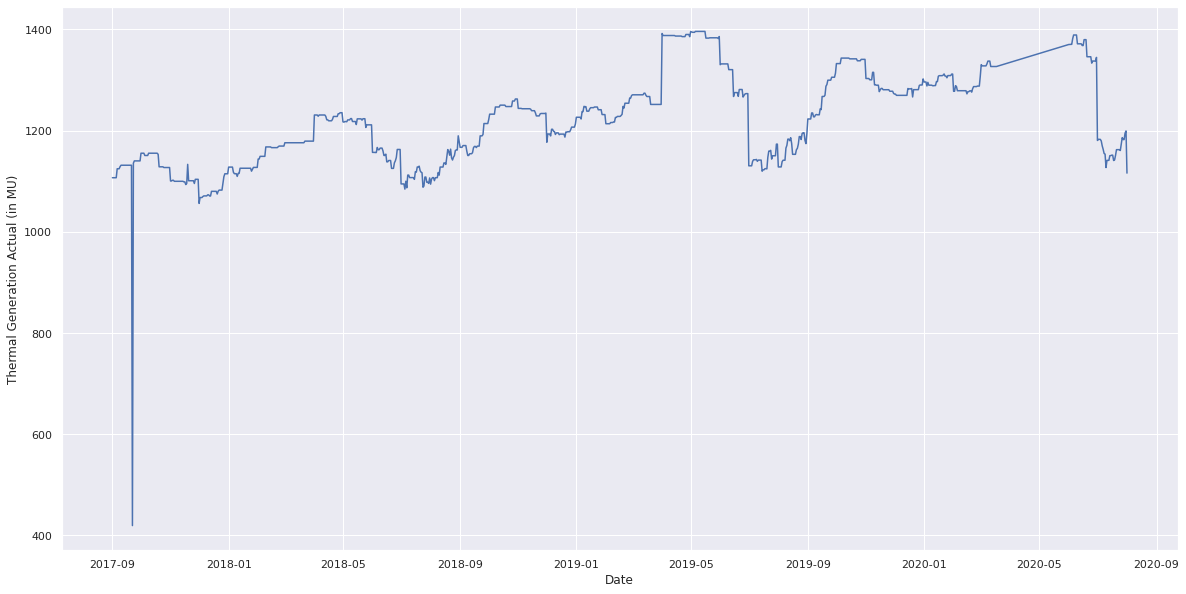

In [181]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Thermal Generation Actual (in MU)', data = western_power)
plt.show()

From the above visualization, we can clearly say that in the western region the thermal power generation is increasing continuously year by year.

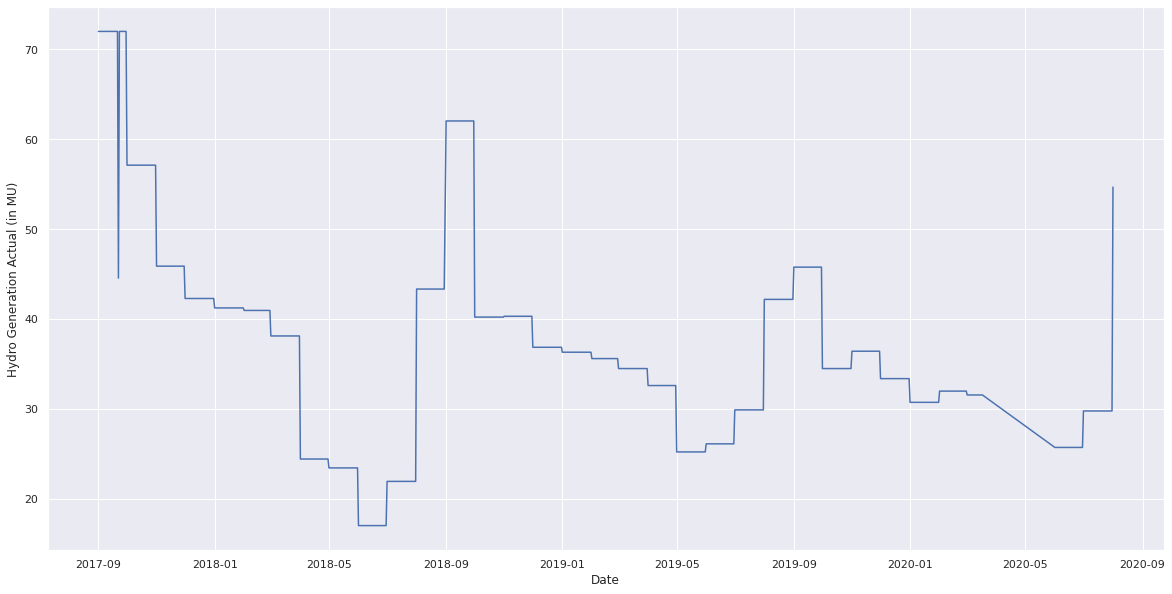

In [182]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Hydro Generation Actual (in MU)', data = western_power)
plt.show()

From the above visualization, we can clearly say that in the western region the hydr power generation decreasing year by year. 

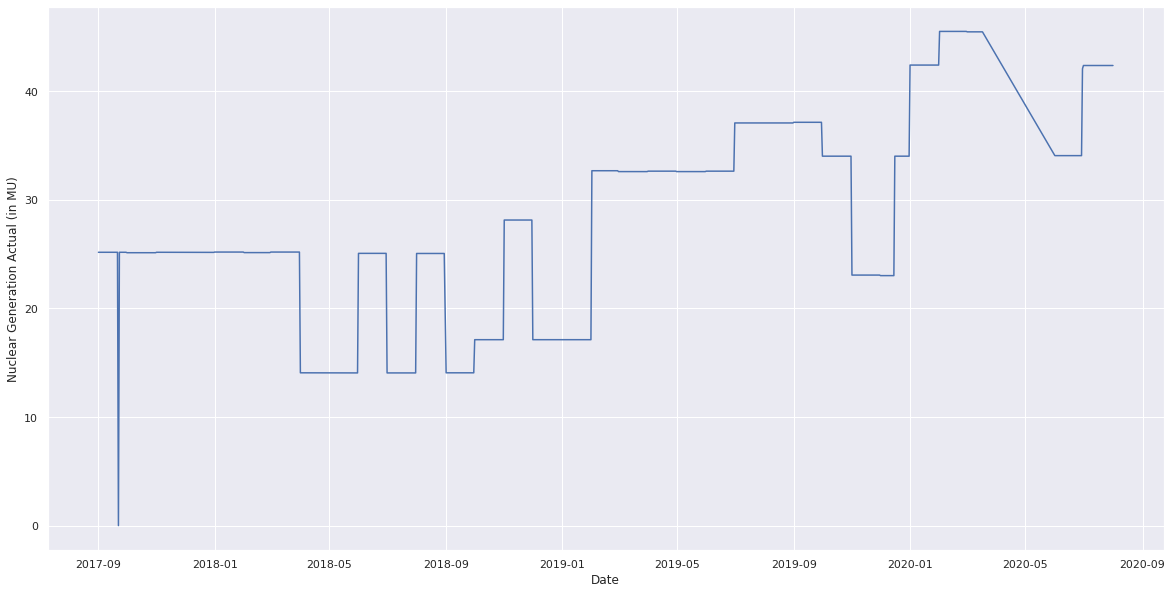

In [183]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Nuclear Generation Actual (in MU)', data = western_power)
plt.show()

From the above visualization, we can clearly say that in the western region the Nuclear power generation is increasing continuously year by year.

## **Power Generation In Eestern Region**

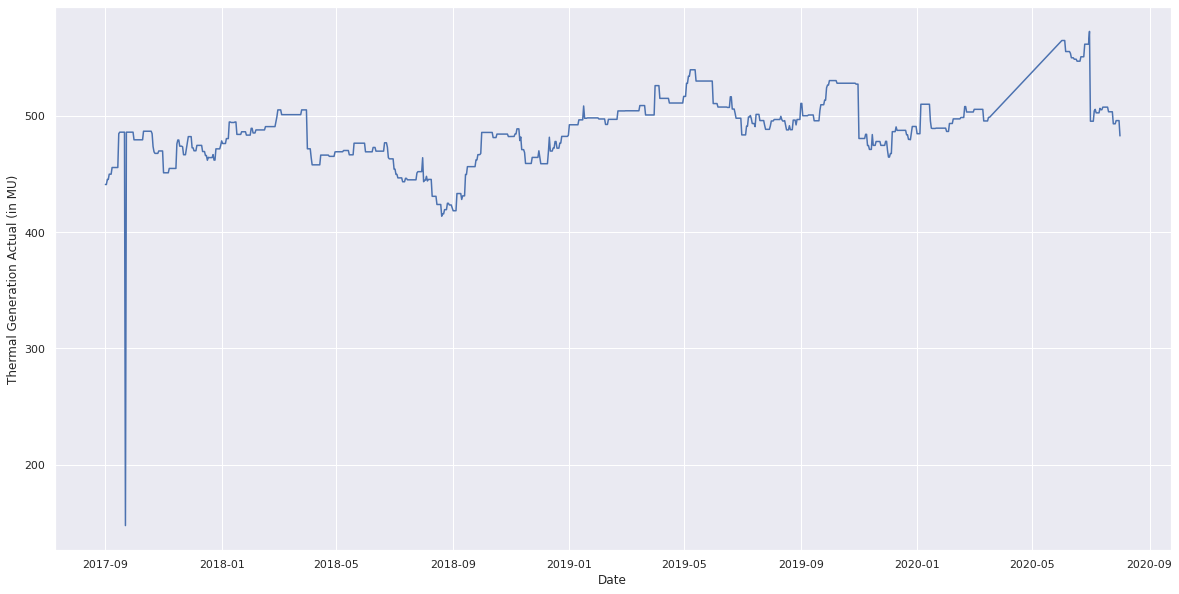

In [184]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Thermal Generation Actual (in MU)', data = Eastern_power)
plt.show()

From the above visualization, we can clearly say that in the Eastern region the thermal power generation is increasing slowly year by year.

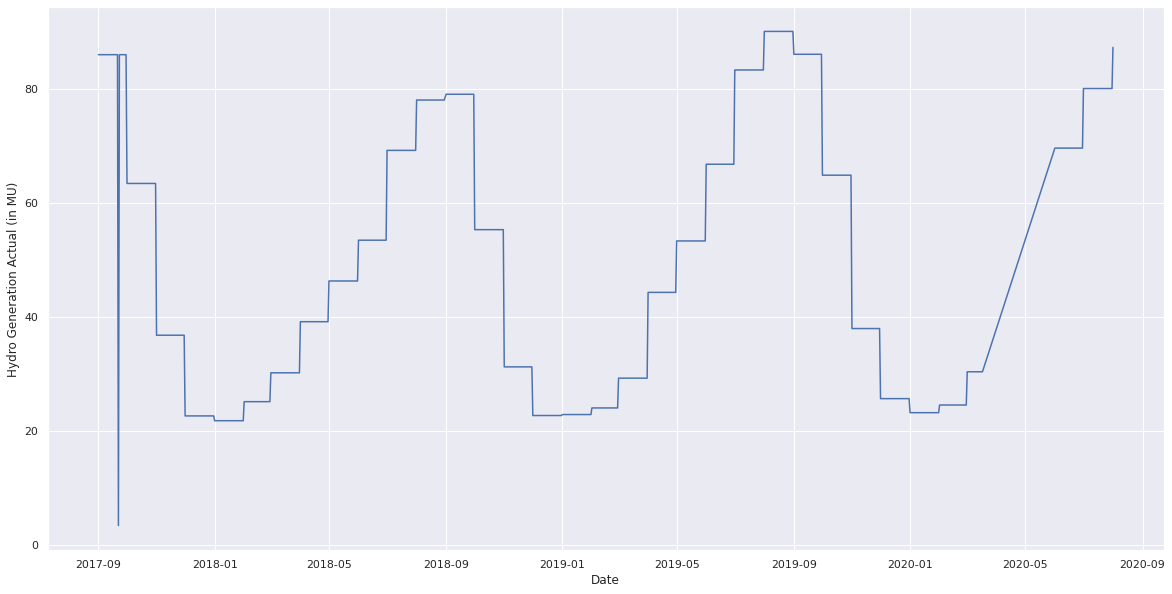

In [185]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Hydro Generation Actual (in MU)', data = Eastern_power)
plt.show()

From the above visualization, we can clearly say that in the Eatern region the hydro power generation is slightly increasing and decreasing year by year. but throughout the year's power generation is increasing slowly.

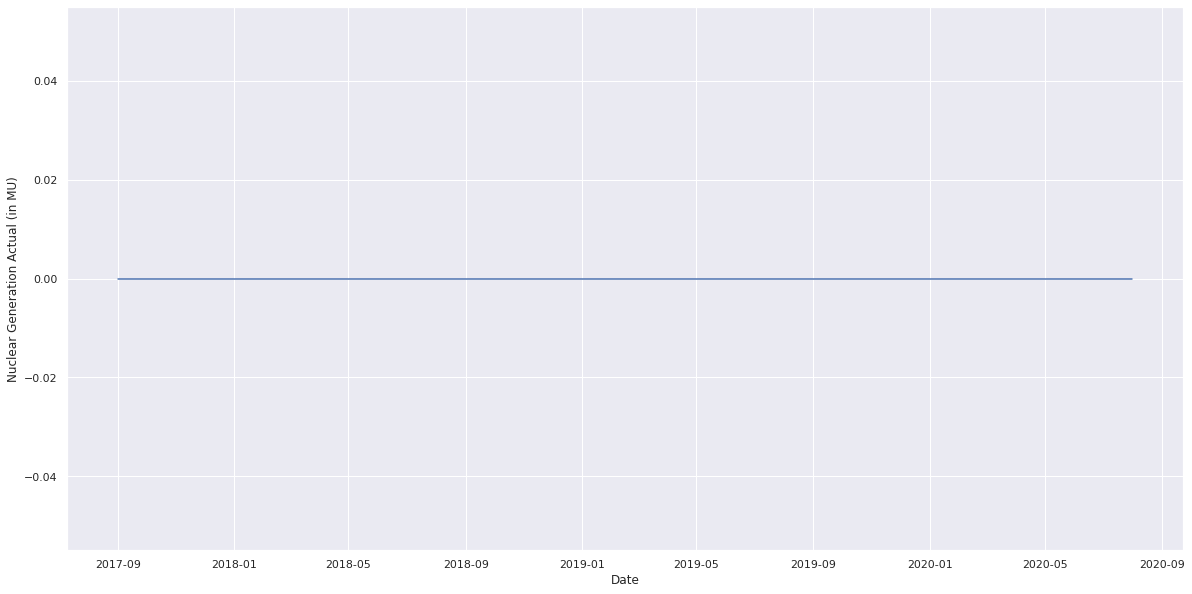

In [186]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Date', y = 'Nuclear Generation Actual (in MU)', data = Eastern_power)
plt.show()

From the above visualization, we can clearly say that in the Eatern region the nuclear power generation is constant year by year.

## **States Power Gneration by Area.**

In [233]:
fig=px.bar(state_df, x='State / Union territory (UT)',y='Area (km2)',hover_data=['Area (km2)'],color='State / Union territory (UT)')
fig.update_layout(title_text='Statewise Area(km2)')
fig.show()

From the above plot Rajasthan has highest area among all the states. 

In [234]:
fig=px.bar(state_df,x='State / Union territory (UT)',y='National Share (%)',hover_data=['National Share (%)'],color='State / Union territory (UT)')
fig.update_layout(title_text='Statewise Generation Share (%)')
fig.show()

From the above plot Rajasthan has highest National Share among all the states.

## **Region wise representation of Nation wise Power Distribution In India**

In [189]:
generation['Thermal Generation Estimated (in MU)'] = generation['Thermal Generation Estimated (in MU)'].astype(str).astype(float)
generation['Thermal Generation Estimated (in MU)'] = generation['Thermal Generation Estimated (in MU)'].astype(str).astype(float)

In [190]:
gen_region = generation.groupby(by=['Region'])[['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)',
                                    'Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)']].sum()
gen_region

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
Region,,,,,,
Eastern,482123.72,468831.45,0.00,0.00,48686.62,52461.95
NorthEastern,32115.79,33105.95,0.00,0.00,17612.32,14058.66
Northern,655048.26,602168.52,26964.08,31378.94,188854.16,201204.03
Southern,610753.56,543828.71,55855.21,46483.24,71109.34,77083.80
Western,1206631.65,1197394.22,27678.34,31880.85,36235.34,35180.02


Here we can see the region-wise power generation of all power plants.

In [191]:
start_date = '2020-03-01'
end_date = '2020-07-01'

In [192]:
gen = (generation['Date'] > start_date) & (generation['Date'] <= end_date)

In [193]:
gen_df = generation.loc[gen]
gen_df

,Date,Region,Month,Year,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Surplus in Thermal Generation,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Surplus in Nuclear Generation,Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Surplus in Hydro Generation,Total Generation Actual (in MU),Total Generation Estimated (in MU),Net Surplus
4555,2020-03-02,Northern,3,2020,711.32,488.46,222.86,21.76,24.74,-2.98,124.40,136.09,-11.69,857.48,649.29,208.19
4556,2020-03-02,Western,3,2020,1327.87,1374.44,-46.57,45.47,40.62,4.85,31.53,33.99,-2.46,1404.87,1449.05,-44.18
4557,2020-03-02,Southern,3,2020,635.36,631.27,4.09,67.16,45.69,21.47,81.21,96.78,-15.57,783.73,773.74,9.99
4558,2020-03-02,Eastern,3,2020,505.72,524.91,-19.19,0.00,0.00,0.00,30.34,27.45,2.89,536.06,552.36,-16.30
4559,2020-03-02,NorthEastern,3,2020,34.28,32.13,2.15,0.00,0.00,0.00,10.37,3.95,6.42,44.65,36.08,8.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,2020-07-01,Northern,7,2020,700.54,716.04,-15.50,26.88,29.37,-2.49,327.08,357.57,-30.49,1054.50,1102.98,-48.48
4786,2020-07-01,Western,7,2020,1180.48,1196.58,-16.10,42.37,34.68,7.69,29.75,58.29,-28.54,1252.60,1289.55,-36.95
4787,2020-07-01,Southern,7,2020,554.71,410.85,143.86,61.83,48.44,13.39,61.43,63.29,-1.86,677.97,522.58,155.39
4788,2020-07-01,Eastern,7,2020,495.49,533.53,-38.04,0.00,0.00,0.00,80.00,100.07,-20.07,575.49,633.60,-58.11


In [194]:
Northern = generation[generation['Region'] == 'Northern']
Western = generation[generation['Region'] == 'Western']
Southern = generation[generation['Region'] == 'Southern']
Eastern = generation[generation['Region'] == 'Eastern']
Northeast = generation[generation['Region'] == 'NorthEastern']

In [195]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=Northern['Date'],y=Northern['Thermal Generation Actual (in MU)'],marker_color='rgb(0,0,204)',name='Northern Region'))
fig.add_trace(
    go.Scatter(x=Western['Date'],y=Western['Thermal Generation Actual (in MU)'],marker_color='rgb(204,0,0)',name='Western Region'))

fig.add_trace(go.Scatter(x=Southern['Date'],y=Southern['Thermal Generation Actual (in MU)'],marker_color='rgb(102,102,51)',name='Southern Region'))

fig.add_trace(go.Scatter(x=Eastern['Date'],y=Eastern['Thermal Generation Actual (in MU)'],marker_color='rgb(102,153,153)',name='Eastern Region'))

fig.add_trace(go.Scatter(x=Northeast['Date'],y=Northeast['Thermal Generation Actual (in MU)'],marker_color='rgb(0,204,153)',name='North-East Region'))
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"),dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),dict(count=1, label="1y", step="year", stepmode="backward"),dict(step="all")])))
fig.update_layout(title='Thermal Generation Actual (in MU)')
fig.show()


Here from the time series analysis of thermal power generation, the western region is high among all the regions. 

In [196]:
fig=go.Figure()

fig.add_trace(
    go.Scatter(x=Northern['Date'],y=Northern['Nuclear Generation Actual (in MU)'],marker_color='rgb(0,0,204)',name='Northern Region'))

fig.add_trace(go.Scatter(x=Western['Date'],y=Western['Nuclear Generation Actual (in MU)'],marker_color='rgb(204,0,0)',name='Western Region'))
fig.add_trace(go.Scatter(x=Southern['Date'],y=Southern['Nuclear Generation Actual (in MU)'],marker_color='rgb(102,102,51)',name='Southern Region'))

fig.add_trace(go.Scatter(x=Eastern['Date'],y=Eastern['Nuclear Generation Actual (in MU)'],marker_color='rgb(102,153,153)',name='Eastern Region'))
fig.add_trace(go.Scatter(x=Northeast['Date'],y=Northeast['Nuclear Generation Actual (in MU)'],marker_color='rgb(0,204,153)',name='North-East Region'))

fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"),dict(count=6, label="6m", step="month", stepmode="backward"),
                  dict(count=1, label="YTD", step="year", stepmode="todate"),dict(count=1, label="1y", step="year", stepmode="backward"),dict(step="all")])))
fig.update_layout(title='Nuclear Generation Actual (in MU)')
fig.show()

Here from the time series analysis of nuclear power generation, the southern region is high among all the regions.

In [197]:
fig=go.Figure()

fig.add_trace(
    go.Scatter(x=Northern['Date'],y=Northern['Hydro Generation Actual (in MU)'],marker_color='rgb(0, 0, 204)',name='Northern Region'))

fig.add_trace(go.Scatter(x=Western['Date'],y=Western['Hydro Generation Actual (in MU)'], marker_color='rgb(204,0,0)',name='Western Region'))
fig.add_trace(go.Scatter(x=Southern['Date'],y=Southern['Hydro Generation Actual (in MU)'],marker_color='rgb(102,102,51)',name='Southern Region'))

fig.add_trace(go.Scatter(x=Eastern['Date'],y=Eastern['Hydro Generation Actual (in MU)'],marker_color='rgb(102,153,153)',name='Eastern Region'))
fig.add_trace(go.Scatter(x=Northeast['Date'],y=Northeast['Hydro Generation Actual (in MU)'],marker_color='rgb(0,204,153)', name='North-East Region'))

fig.update_xaxes(rangeslider_visible=True,rangeselector=dict( buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"),dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),dict(count=1, label="1y", step="year", stepmode="backward"),dict(step="all")])))
fig.update_layout(title='Hydro Generation Actual (in MU)')
fig.show()

Here from the time series analysis of hydro power generation,in the northern region is the power generation is increasing and decresing yearly but the power is slightly increasing.

In [198]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=Northern['Date'],y=Northern['Total Generation Actual (in MU)'],marker_color='rgb(0, 0, 204)',name='Northern Region'))

fig.add_trace(go.Scatter(x=Western['Date'],y=Western['Total Generation Actual (in MU)'],marker_color='rgb(204,0,0)',name='Western Region'))
fig.add_trace(go.Scatter(x=Southern['Date'],y=Southern['Total Generation Actual (in MU)'],marker_color='rgb(102,102,51)',name='Southern Region'))

fig.add_trace(go.Scatter(x=Eastern['Date'],y=Eastern['Total Generation Actual (in MU)'],marker_color='rgb(102,153,153)',name='Eastern Region'))
fig.add_trace(go.Scatter(x=Northeast['Date'],y=Northeast['Total Generation Actual (in MU)'],marker_color='rgb(0,204,153)',name='North-East Region'))


fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"),dict(count=6, label="6m", step="month", stepmode="backward"),dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),dict(step="all")])))
fig.update_layout(title='Total Actual Generation (in MU)')
fig.show()

##**Actual power vs Predicted power**

In [199]:
def actualVpredicted(df,f1,f2):
    fig = go.Figure()
    fig.add_trace(go.Bar(x=df.Region,y=df.groupby(['Region'])[f1].sum(),name='Actual power',marker_color='indianred'))
    fig.add_trace(go.Bar(x=df.Region,y=df.groupby(['Region'])[f2].sum(),name='Predicted power',marker_color='lightsalmon' ))
    fig.update_layout(barmode='group')
    fig.show()

In [200]:
actualVpredicted(generation,"Thermal Generation Actual (in MU)","Thermal Generation Estimated (in MU)")

From the above plot in the western region the actual thermal power and predicted thermal power in very low compared to all the regions and the highest thermal power generation is in the NorthEastern region.


In [201]:
actualVpredicted(generation,"Nuclear Generation Actual (in MU)","Nuclear Generation Estimated (in MU)")

From the above plot in the western region and Northern region, there was no nuclear power generated and the highest actual and predicted nuclear power generation is in the Eastern region.

In [202]:
actualVpredicted(generation,"Hydro Generation Actual (in MU)","Hydro Generation Estimated (in MU)")

From the above plot in the western region the actual hydro power and predicted hydro power in very low compared to all the regions and the highest thermal power generation is in the southern region.

In [203]:
x = generation[["Thermal Generation Estimated (in MU)"]].values
y = generation[["Thermal Generation Actual (in MU)"]].values

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Model Creation**

In this process, we are going to build and train six different types of linear regression models which are the OLS model, Ridge regression model, Lasso regression model, Randomforest regression model, GradientBoosting regression model,AdaBoost regression model.. For all the models, we are going to use the pre-built algorithms provided by the scikit-learn package in python. And the process for all the models are the same, first, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

# **Model Evaluation**
To evaluate our model we are going to use the 'r2_score','mean_absolute_error','mean_squared_error', metric functions which are provided by the scikit-learn package in python.
When it comes to the ‘r2_score’ (R-squared) metric. What is R-squared? R-squared is a measurement of how well the dependent variable explains the variance of the independent variable. It is the most popular evaluation metric for regression models. The ideal ‘r2_score’ of a build should be more than 0.70 (at least > 0.60).
Our next evaluation metric is the ‘mean_absolute_error’ metric. What is mean_absolute_error? The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset.and the next metric is ‘mean_absolute_error’ , Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set.

In [205]:
linreg = LinearRegression()
Randomregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
GB = GradientBoostingRegressor(n_estimators=2)
AD = AdaBoostRegressor()
rd = Ridge()
ls2 = Lasso(alpha=3)

In [206]:
linreg.fit(x_train,y_train)
Randomregressor.fit(x_train, y_train)
GB.fit(x_train,y_train)
AD.fit(x_train,y_train)
rd.fit(x_train,y_train)
ls2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Lasso(alpha=3)

In [207]:
y_pred = linreg.predict(x_test)
y_Rr =Randomregressor.predict(x_test)
y_gb = GB.predict(x_test)
y_ad = AD.predict(x_test)
y_rd = rd.predict(x_test)
y_ls = ls2.predict(x_test)

In [208]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2score", r2_score(y_test,y_pred))

MAE 57.28538455876251
MSE 5668.419911560253
RMSE 75.28890961861683
r2score 0.9606953845199169


In [209]:
print("MAE",mean_absolute_error(y_test,y_Rr))
print("MSE",mean_squared_error(y_test,y_Rr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_Rr)))
print("r2score", r2_score(y_test,y_Rr))

MAE 44.14698386914795
MSE 4273.994877179233
RMSE 65.37579733494066
r2score 0.9703642764946228


In [210]:
print("MAE",mean_absolute_error(y_test,y_gb))
print("MSE",mean_squared_error(y_test,y_gb))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_gb)))
print("r2score", r2_score(y_test,y_gb))

MAE 229.08292818371473
MSE 95584.32207020179
RMSE 309.16714261092136
r2score 0.33722182133475753


In [211]:
print("MAE",mean_absolute_error(y_test,y_ad))
print("MSE",mean_squared_error(y_test,y_ad))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_ad)))
print("r2score", r2_score(y_test,y_ad))

MAE 42.7514760404091
MSE 3342.2344522800877
RMSE 57.81206147751598
r2score 0.976825069059678


In [212]:
print("MAE",mean_absolute_error(y_test,y_rd))
print("MSE",mean_squared_error(y_test,y_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_rd)))
print("r2score", r2_score(y_test,y_rd))

MAE 57.285384656839305
MSE 5668.419910458703
RMSE 75.28890961130134
r2score 0.960695384527555


In [213]:
print("MAE",mean_absolute_error(y_test,y_ls))
print("MSE",mean_squared_error(y_test,y_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_ls)))
print("r2score", r2_score(y_test,y_ls))

MAE 57.28657120636572
MSE 5668.406643819527
RMSE 75.28882150637986
r2score 0.9606954765179438


In [214]:
models = [LinearRegression(),
RandomForestRegressor(),
Ridge(),
Lasso(),
GradientBoostingRegressor(),
AdaBoostRegressor()
    ]

In [215]:
model_names = [
    "         Logistic Regression",
    "      Random forest regressor",
    "             Ridge regressor",
    "               Lasso regressor",
    "         Gradient Boosting Regressor",
    "          Ada Boost Regressor"
]

In [216]:
results = []

for i in range(len(models)):
    models[i].fit(x_train, y_train)
    results.append(models[i].score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [217]:
for i in range(len(models)):
    print(model_names[i] + ": {:.5f}".format(results[i]))

         Logistic Regression: 0.96070
      Random forest regressor: 0.97046
             Ridge regressor: 0.96070
               Lasso regressor: 0.96070
         Gradient Boosting Regressor: 0.97941
          Ada Boost Regressor: 0.97643


When analyzing the report, it is noted that the R-squared of the Gradient Boosting Regressor model is seemed to be the highest which means, it takes the place of being the most suitable model for our dataset (on the basis of R-squared).  The performance among the all models is approximatly same .
We can conclude that Gradient Boosting Regressor  can be used for our house price dataset.

## **Modeling of actual power generated vs eastimated power generated**

In [218]:
x = generation[['Total Generation Estimated (in MU)']].values
y = generation[['Total Generation Actual (in MU)']].values

In [219]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [220]:
linreg = LinearRegression()
Randomregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
GB = GradientBoostingRegressor(n_estimators=2)
AD = AdaBoostRegressor()
rd = Ridge()
ls2 = Lasso(alpha=3)

In [221]:
linreg.fit(x_train,y_train)
Randomregressor.fit(x_train, y_train)
GB.fit(x_train,y_train)
AD.fit(x_train,y_train)
rd.fit(x_train,y_train)
ls2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Lasso(alpha=3)

In [222]:
y_pred = linreg.predict(x_test)
y_Rr =Randomregressor.predict(x_test)
y_gb = GB.predict(x_test)
y_ad = AD.predict(x_test)
y_rd = rd.predict(x_test)
y_ls = ls2.predict(x_test)

In [223]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2score", r2_score(y_test,y_pred))

MAE 52.20708052267786
MSE 4934.600972354327
RMSE 70.24671502892022
r2score 0.9707438007111083


In [224]:
print("MAE",mean_absolute_error(y_test,y_Rr))
print("MSE",mean_squared_error(y_test,y_Rr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_Rr)))
print("r2score", r2_score(y_test,y_Rr))

MAE 48.12066490478597
MSE 5555.596208289684
RMSE 74.53587195632505
r2score 0.9670620520789978


In [225]:
print("MAE",mean_absolute_error(y_test,y_gb))
print("MSE",mean_squared_error(y_test,y_gb))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_gb)))
print("r2score", r2_score(y_test,y_gb))

MAE 267.27045170814955
MSE 112232.30834673226
RMSE 335.01090780261507
r2score 0.33459852214195074


In [226]:
print("MAE",mean_absolute_error(y_test,y_ad))
print("MSE",mean_squared_error(y_test,y_ad))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_ad)))
print("r2score", r2_score(y_test,y_ad))

MAE 56.1966252964096
MSE 5428.529037804643
RMSE 73.67855208813921
r2score 0.9678154062982371


In [227]:
print("MAE",mean_absolute_error(y_test,y_rd))
print("MSE",mean_squared_error(y_test,y_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_rd)))
print("r2score", r2_score(y_test,y_rd))

MAE 52.20708064959858
MSE 4934.600972847573
RMSE 70.24671503243104
r2score 0.970743800708184


In [228]:
print("MAE",mean_absolute_error(y_test,y_ls))
print("MSE",mean_squared_error(y_test,y_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_ls)))
print("r2score", r2_score(y_test,y_ls))

MAE 52.20860752004117
MSE 4934.606959546448
RMSE 70.24675764436711
r2score 0.97074376521432


In [229]:
models = [LinearRegression(),
RandomForestRegressor(),
Ridge(),
Lasso(),
GradientBoostingRegressor(),
AdaBoostRegressor()
    ]

In [230]:
model_names = [
    "         Logistic Regression",
    "      Random forest regressor",
    "             Ridge regressor",
    "               Lasso regressor",
    "         Gradient Boosting Regressor",
    "          Ada Boost Regressor"
]


In [231]:
results = []

for i in range(len(models)):
    models[i].fit(x_train, y_train)
    results.append(models[i].score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [232]:
for i in range(len(models)):
    print(model_names[i] + ": {:.5f}".format(results[i]))

         Logistic Regression: 0.97074
      Random forest regressor: 0.96698
             Ridge regressor: 0.97074
               Lasso regressor: 0.97074
         Gradient Boosting Regressor: 0.97673
          Ada Boost Regressor: 0.96886


# **Conclusions**

1)There is no nuclear power being generated in the Eastern and NorthEastern regions, for over 4 years.So it is possible that there are no nuclear power plants or at least no active nuclear power plants in the Eastern and NorthEastern regions of India.

2)From the time series analysis the thermal power is generated more compare to other power plants.

3)The total power generated till march 2020 was 3542.460000(MU)

4)From all the states Rajasthan has highest National Share among all .

5)it is noted that the R-squared of the Gradient Boosting Regressor model is seemed to be the highest which means, it takes the place of being the most suitable model for our dataset (on the basis of R-squared). The performance among the all models is approximatly same . We can conclude that Gradient Boosting Regressor can be used for our house price dataset.
